In [ ]:
pip install git+https://github.com/tensorflow/examples.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-v6qhim1_
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-v6qhim1_
  Resolved https://github.com/tensorflow/examples.git to commit 548f701bbd258ca22edd6d1655336d594f7b4072
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1685755875.482753997327659721731712354189466050931602440306-py3-none-any.whl size=299978 sha256=caab6994fc78f7107fea4b33de39b76b01dd4524c4099bdf45d0e966355ff107
  Stored in directory: /tmp/pip-ephem-wheel-cache-i3yw54tj/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
#1. Import packages
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob, os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/data-science-bowl-2018.zip" -d "/content/drive/MyDrive/data-science-bowl-2018_data"

Archive:  /content/drive/MyDrive/data-science-bowl-2018.zip
   creating: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/
   creating: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test/
   creating: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test/inputs/
 extracting: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test/inputs/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png  
 extracting: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test/inputs/0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275.png  
 extracting: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test/inputs/06350c7cc618be442c15706db7a68e91f313758d224de4608f9b960106d4f9ca.png  
 extracting: /content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test/inputs/0d2bf916cc8de90d02f4cd4c23ea79b227db

In [ ]:
filepath = "/content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/train"
images = []
masks = []

In [ ]:
#Use os.listdir() method to list down all the image file, then use a for loop to read the images.
"""
for ____ in os.listdir(____):
    function you will use here:
    os.path.join()
    cv2.imread()
    cv2.cvtColor()
    cv2.resize()

Use this for loop, do the same thing for the label. But I suggest you read the label as a grayscale image.
"""

'\nfor ____ in os.listdir(____):\n    function you will use here:\n    os.path.join()\n    cv2.imread()\n    cv2.cvtColor()\n    cv2.resize()\n\nUse this for loop, do the same thing for the label. But I suggest you read the label as a grayscale image.\n'

In [ ]:
#2. Load images
image_path = os.path.join(filepath,'inputs')
for img in os.listdir(image_path):
    #Get the full path of the image file
    full_path = os.path.join(image_path,img)
    #Read the image file based on the full path
    img_np = cv2.imread(full_path)
    #Convert the image from bgr to rgb
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    #Resize the image into 128x128
    img_np = cv2.resize(img_np,(128,128))
    #Place the image into the empty list
    images.append(img_np)

In [ ]:
#3. Load masks
mask_path = os.path.join(filepath,'masks')
for mask in os.listdir(mask_path):
    #Get the full path of the mask file
    full_path = os.path.join(mask_path,mask)
    #Read the mask file as a grayscale image
    mask_np = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    #Resize the image into 128x128
    mask_np = cv2.resize(mask_np,(128,128))
    #Place the mask into the empty list
    masks.append(mask_np)

In [ ]:
print(len(images))
print(len(masks))

603
603


In [ ]:
filepath = "/content/drive/MyDrive/data-science-bowl-2018_data/data-science-bowl-2018-2/test"
images = []
masks = []

In [ ]:
#Use os.listdir() method to list down all the image file, then use a for loop to read the images.
"""
for ____ in os.listdir(____):
    function you will use here:
    os.path.join()
    cv2.imread()
    cv2.cvtColor()
    cv2.resize()

Use this for loop, do the same thing for the label. But I suggest you read the label as a grayscale image.
"""

'\nfor ____ in os.listdir(____):\n    function you will use here:\n    os.path.join()\n    cv2.imread()\n    cv2.cvtColor()\n    cv2.resize()\n\nUse this for loop, do the same thing for the label. But I suggest you read the label as a grayscale image.\n'

In [ ]:
image_path = os.path.join(filepath,'inputs')
for img in os.listdir(image_path):
    #Get the full path of the image file
    full_path = os.path.join(image_path,img)
    #Read the image file based on the full path
    img_np = cv2.imread(full_path)
    #Convert the image from bgr to rgb
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    #Resize the image into 128x128
    img_np = cv2.resize(img_np,(128,128))
    #Place the image into the empty list
    images.append(img_np)

In [ ]:
mask_path = os.path.join(filepath,'masks')
for mask in os.listdir(mask_path):
    #Get the full path of the mask file
    full_path = os.path.join(mask_path,mask)
    #Read the mask file as a grayscale image
    mask_np = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    #Resize the image into 128x128
    mask_np = cv2.resize(mask_np,(128,128))
    #Place the mask into the empty list
    masks.append(mask_np)

In [ ]:
print(len(images))
print(len(masks))

67
67


In [ ]:
#4. Convert the list of np array into a full np array
images_np = np.array(images)
masks_np = np.array(masks)

In [ ]:
#5. Data preprocessing
#5.1. Expand the mask dimension to include the channel axis
masks_np_exp = np.expand_dims(masks_np,axis=-1)
#5.2. Convert the mask value into just 0 and 1
converted_masks_np = np.round(masks_np_exp/255)
#5.3. Normalize the images pixel value
normalized_images_np = images_np/255.0

In [ ]:
#!pip uninstall numpy

In [ ]:
#6. Perform train test split
import sklearn
from sklearn.model_selection import train_test_split
SEED = 12345
X_train,X_test,y_train,y_test = train_test_split(normalized_images_np,converted_masks_np,shuffle=True,random_state=SEED)

In [ ]:
#7. Convert the numpy array into tensorflow tensors
X_train_tensor = tf.data.Dataset.from_tensor_slices(X_train)
X_test_tensor = tf.data.Dataset.from_tensor_slices(X_test)
y_train_tensor = tf.data.Dataset.from_tensor_slices(y_train)
y_test_tensor = tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
#8. Combine features and labels together to form a zip dataset
train = tf.data.Dataset.zip((X_train_tensor,y_train_tensor))
test = tf.data.Dataset.zip((X_test_tensor,y_test_tensor))

In [ ]:
#9. Define hyperparameters for the tensorflow dataset
TRAIN_LENGTH = len(X_train)
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
#10. Apply the load_image function to the dataset using map method
# Prepare the training dataset
train_images = train.shuffle(buffer_size=BUFFER_SIZE)
train_images = train_images.batch(BATCH_SIZE)
train_images = train_images.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Prepare the testing dataset
test_images = test.batch(BATCH_SIZE)
test_images = test_images.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
import tensorflow as tf

# Assuming you have X_train and y_train as your training data and labels
BATCH_SIZE = 32

# Create a TensorFlow dataset from your training data and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#Print an example from the training dataset
# Print an example from the training dataset
for image, mask in train_dataset.take(1):
    print("image shape:", image.shape)
    print("mask shape:", mask.shape)


image shape: (32, 128, 128, 3)
mask shape: (32, 128, 128, 1)


In [ ]:
#11. Create a data augmentation layer through creating a custom class
import tensorflow.keras as keras
class Augment(keras.layers.Layer):
    def __init__(self,seed=42):
        super().__init__()
        self.augment_inputs = keras.layers.RandomFlip(mode='horizontal',seed=seed)
        self.augment_labels = keras.layers.RandomFlip(mode='horizontal',seed=seed)

    def call(self,inputs,labels):
        inputs = self.augment_inputs(inputs)
        labels = self.augment_labels(labels)
        return inputs,labels

In [ ]:
#12. Build the dataset
# Define the augmentation function
def augment_data(images, labels):
    images = tf.image.random_flip_left_right(images[0])
    labels = tf.image.random_flip_left_right(labels[0])
    return images, labels

# Build the dataset with augmentation
train_batches = (
    train_images
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .map(augment_data)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

test_batches = test_images.batch(BATCH_SIZE)

In [ ]:
#13. Inspect some data
def display(display_list):
    plt.figure(figsize=(15,15))
    title = ["Input Image","True Mask","Predicted Mask"]
    for i in range(len(display_list)):
        plt.subplot(1,len(display_list),i+1)
        plt.title(title[i])
        plt.imshow(keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [ ]:
#9. Model development
"""
The plan is to apply transfer learning by using a pretrained model as the feature extractor.
Then, we will proceed to build our own upsampling path with the tensorflow_example module we just imported + other default keras layers.
"""

'\nThe plan is to apply transfer learning by using a pretrained model as the feature extractor.\nThen, we will proceed to build our own upsampling path with the tensorflow_example module we just imported + other default keras layers.\n'

In [ ]:
#9.1. Use a pretrained model as feature extractor
from tensorflow import keras
base_model = keras.applications.MobileNetV2(input_shape=[128,128,3],include_top=False)
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [ ]:
#9.2. Specify the layers that we need as outputs for the feature extractor

layer_names = [
    "block_1_expand_relu",      #64x64
    "block_3_expand_relu",      #32x32
    "block_6_expand_relu",      #16x16
    "block_13_expand_relu",     #8x8
    "block_16_project"          #4x4
]

base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

In [ ]:
#9.3. Instantiate the feature extractor

down_stack = keras.Model(inputs=base_model.input,outputs=base_model_outputs)
down_stack.trainable = False

In [ ]:
#9.4. Define the upsampling path
up_stack = [
    pix2pix.upsample(512,3),        #4x4  --> 8x8
    pix2pix.upsample(256,3),        #8x8  --> 16x16
    pix2pix.upsample(128,3),        #16x16 --> 32x32
    pix2pix.upsample(64,3)          #32x32 --> 64x64
]

In [ ]:
#9.5. Define a function for the unet creation.
def unet(output_channels:int):
    """
    We are going to use functional API to connect the downstack and upstack properly
    """
    #(A) Input layer
    inputs = keras.Input(shape=[128,128,3])
    #(B) Down stack (Feature extractor)
    skips = down_stack(inputs)
    x = skips[-1]       #This is the output that will progress until the end of the model
    skips = reversed(skips[:-1])

    #(C) Build the upsampling path
    """
    1. Let the final output from the down stack flow through the up stack
    2. Concatenate the output properly by following the structure of the U-Net
    """
    for up,skip in zip(up_stack,skips):
        x = up(x)
        concat = keras.layers.Concatenate()
        x = concat([x,skip])

    #(D) Use a transpose convolution layer to perform one last upsampling. This convolution layer will become the output layer as well.
    last = keras.layers.Conv2DTranspose(output_channels,kernel_size=3,strides=2,padding='same')     #64x64 --> 128x128
    outputs = last(x)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model

In [ ]:
#9.6. Create the U-Net model by using the function
OUTPUT_CLASSES = 3
model = unet(OUTPUT_CLASSES)
model.summary()
keras.utils.plot_model(model)

In [ ]:
#10. Compile the model
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

1/1 [==============================] - 1s 1s/step


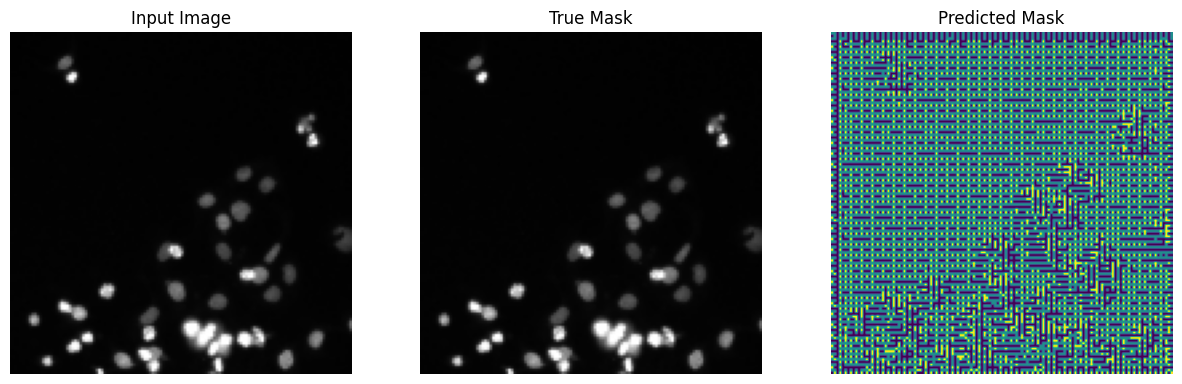

In [ ]:
#11. Create functions to show predictions
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[...,tf.newaxis]       #equivalent to tf.expand_dims()
    return pred_mask[0]

def show_predictions(dataset=None,num=1):
    if dataset:
        for image,mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0],mask[0],create_mask(pred_mask)])
    else:
        display([sample_image,sample_mask,create_mask(model.predict(sample_image[tf.newaxis,...]))])

show_predictions()

In [ ]:
#12. Create a custom callback function to display results during model training
class DisplayCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        #clear_output(wait=True)
        show_predictions()
        print('\nSample prediction after epoch #{}\n'.format(epoch+1))

Epoch 1/5
1/1 [==============================] - 0s 99ms/step


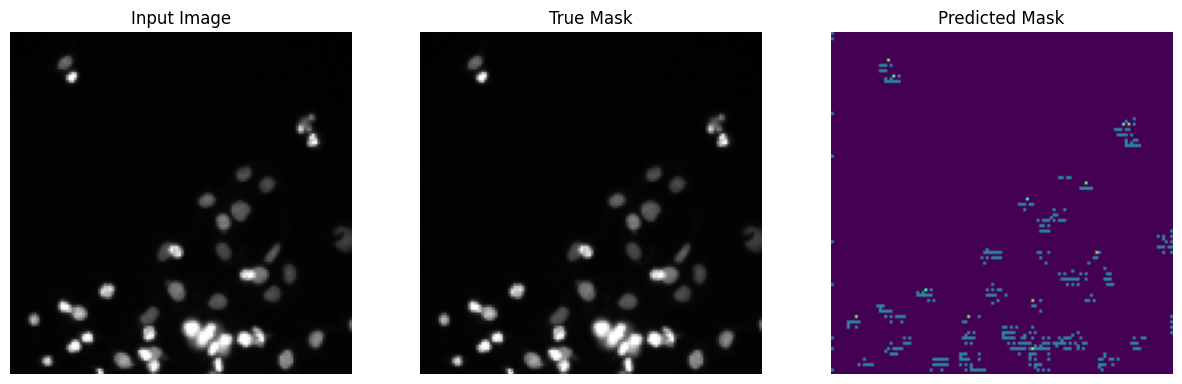


Sample prediction after epoch #1

1/1 [==============================] - 5s 5s/step - loss: 0.5465 - accuracy: 0.8197
Epoch 2/5
1/1 [==============================] - 0s 74ms/step


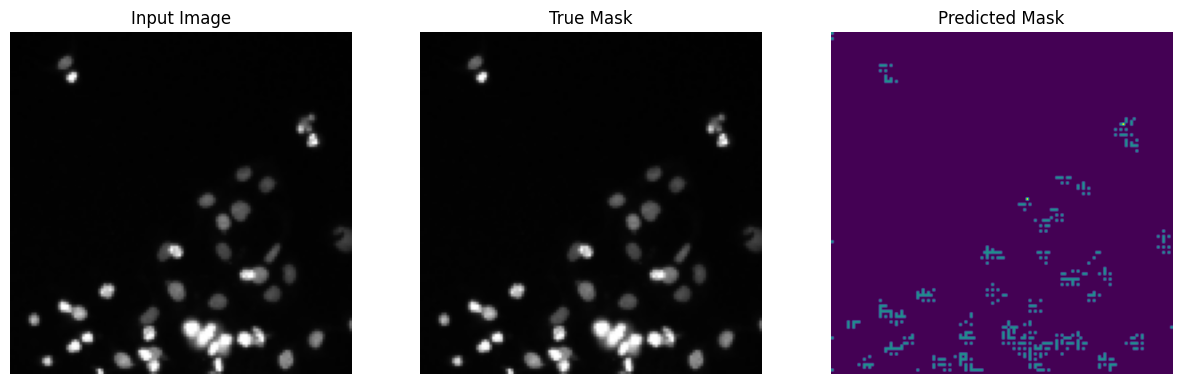


Sample prediction after epoch #2

1/1 [==============================] - 2s 2s/step - loss: 0.3614 - accuracy: 0.8990
Epoch 3/5


1/1 [==============================] - 0s 74ms/step


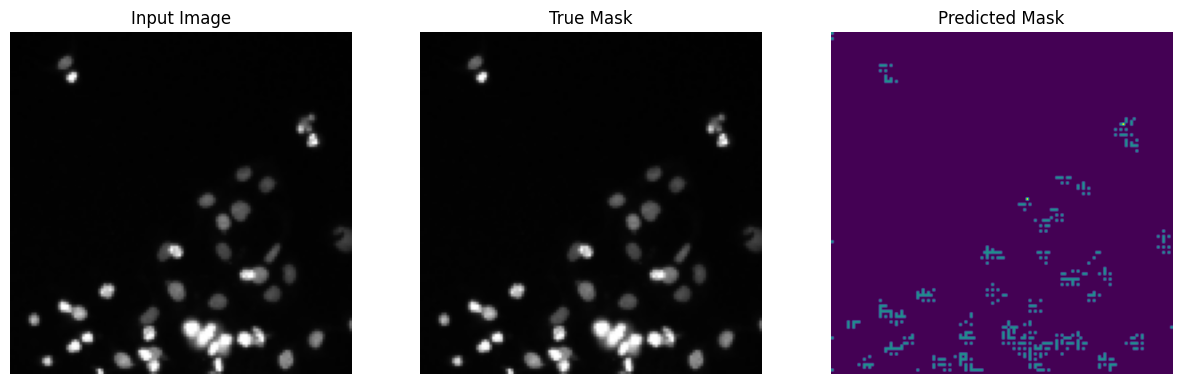


Sample prediction after epoch #3

1/1 [==============================] - 1s 533ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [96]:
#13.Model training
EPOCHS = 5
VAL_SUBSPLITS = 5
VALIDATION_STEPS = len(X_test) // BATCH_SIZE // VAL_SUBSPLITS
STEPS_PER_EPOCH = len(X_train) // BATCH_SIZE

# Assuming you have X_test and y_test as your test data and labels
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    validation_steps=VALIDATION_STEPS,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[DisplayCallback()]
)


1/1 [==============================] - 1s 1s/step


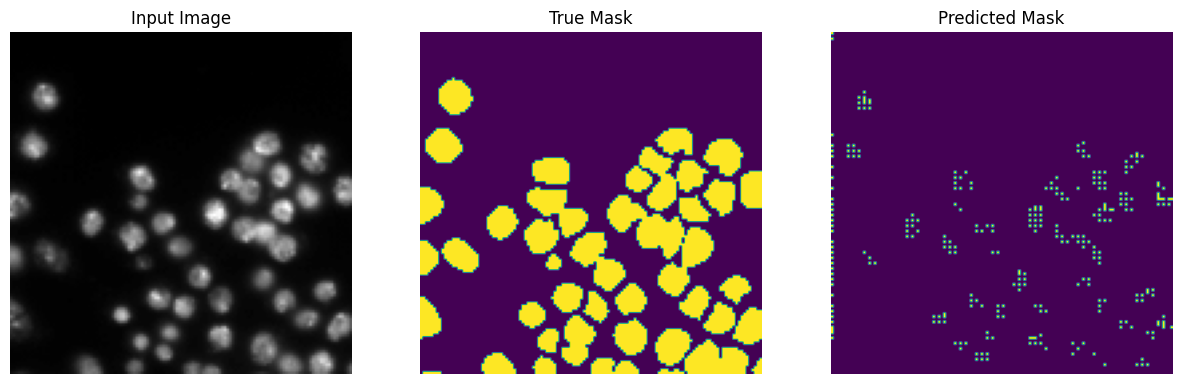

In [97]:
#14. Model deployment
show_predictions(test_images,3)

In [98]:
PATH = os.getcwd()
print(PATH)

#Model save path
model_save_path = os.path.join(PATH,"saved_models")
keras.models.save_model(model,model_save_path)

model_loaded = keras.models.load_model(model_save_path)

model_path = os.path.join(model_save_path,"model.h5")
model.save(model_path)

/content
